In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [126]:
df = pd.read_csv("restaurant dataset.csv")

## 1-Exploratory Data Analysis

In [127]:
df.head()

,id,name,table_bookings,online_ordering,location,rating,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,Unnamed: 13
0,19281,Plan B,No,No,Greenwich,4.2/5,1651.0,8041609100,Casual Dining,Drinks & nightlife,7.0,4.0,American,NaN
1,16095,Mom's Kitchen,No,No,East Village,NaN,0.0,"9738732072, 9742716121",Delivery,Delivery,1.0,1.0,American,NaN
2,42040,Keys Cafe - Keys Hotel,No,No,Chinatown,2.8 /5,161.0,080 39451000\n 8884038484,Casual Dining,Dine-out,7.0,3.0,Chinese,NaN
3,18753,Smally's Resto Cafe,Yes,No,Greenwich,4.0/5,401.0,"080 48149349, 9632015858",Cafe,Dine-out,7.0,5.0,Snacks,NaN
4,21065,Fabcafe,No,Yes,Chelsea,3.8 /5,11.0,8050403072,Cafe,Dine-out,1.0,2.0,Snacks,NaN


In [128]:
df.shape

(3484, 14)

In [129]:
df.columns

Index(['id', 'name', 'table_bookings', 'online_ordering', 'location', 'rating',
       'votes', 'phone', 'restaurant_type', 'restaurant_operation',
       'popular_dishes', 'cuisines_offered', 'primary_cuisine', 'Unnamed: 13'],
      dtype='object')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3484 non-null   int64  
 1   name                  3484 non-null   object 
 2   table_bookings        3484 non-null   object 
 3   online_ordering       3484 non-null   object 
 4   location              3484 non-null   object 
 5   rating                2960 non-null   object 
 6   votes                 3418 non-null   float64
 7   phone                 3435 non-null   object 
 8   restaurant_type       3342 non-null   object 
 9   restaurant_operation  3456 non-null   object 
 10  popular_dishes        3312 non-null   float64
 11  cuisines_offered      3456 non-null   float64
 12  primary_cuisine       3456 non-null   object 
 13  Unnamed: 13           2435 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 381.2+ KB


In [131]:
df.describe()

,id,votes,popular_dishes,cuisines_offered,Unnamed: 13
count,3484.000000,3418.000000,3312.000000,3456.000000,2435.000000
mean,24349.432549,465.926273,3.558877,2.567708,0.520329
std,14038.782967,1231.999492,2.806695,1.316285,0.499689
min,53.000000,0.000000,1.000000,1.000000,0.000000
25%,11029.500000,9.000000,1.000000,2.000000,0.000000
50%,22513.500000,66.000000,1.000000,2.000000,1.000000
75%,34710.000000,379.000000,7.000000,3.000000,1.000000
max,51708.000000,14723.000000,7.000000,8.000000,1.000000


### Notes:
- We need to remove the '/5' part from the ratings column
- We need to investigate the 'Unnamed column' as it appears that it has some data

In [132]:
# Quick test
"4.2/5".removesuffix('/5') 

'4.2'

In [133]:
# We can only do this operation only with values, so, we exclude Nan values for now
# df['rating'].notnull().map(lambda x: x.removesuffix('/5')) # This line produces some errors related to variables type, so this column might be having some wrong data

In [134]:
df['rating'].unique()

array(['4.2/5', nan, '2.8 /5', '4.0/5', '3.8 /5', '4.5 /5', '3.7 /5',
       '3.9 /5', '4.4 /5', '4.1/5', '3.7/5', '4.1 /5', '3.5/5', 'NEW',
       '4.4/5', '3.2 /5', '3.4 /5', '2.9/5', '3.5 /5', '3.9/5', '3.1 /5',
       '3.3 /5', '3.6/5', '4.5/5', '2.6 /5', '4.2 /5', '4.0 /5', '3.2/5',
       '2.7 /5', '3.8/5', '4.3/5', '4.3 /5', '4.7 /5', '2.8/5', '3.1/5',
       '3.6 /5', '2.4 /5', '3.4/5', '3.0/5', '2.9 /5', '2.6/5', '2.7/5',
       '3.0 /5', '3.3/5', '4.7/5', '2.5/5', '4.6 /5', '4.6/5', '4.8 /5',
       '2.5 /5', '4.8/5', '-', '2.2/5', '2.1 /5', '2.4/5'], dtype=object)

In [135]:
# Lets replace 'NEW' and '-' with nan, also, we need to remove sapces to unify the data
df['rating'].replace(["-", "NEW"], np.nan, inplace=True)

In [136]:
df['rating'].unique()

array(['4.2/5', nan, '2.8 /5', '4.0/5', '3.8 /5', '4.5 /5', '3.7 /5',
       '3.9 /5', '4.4 /5', '4.1/5', '3.7/5', '4.1 /5', '3.5/5', '4.4/5',
       '3.2 /5', '3.4 /5', '2.9/5', '3.5 /5', '3.9/5', '3.1 /5', '3.3 /5',
       '3.6/5', '4.5/5', '2.6 /5', '4.2 /5', '4.0 /5', '3.2/5', '2.7 /5',
       '3.8/5', '4.3/5', '4.3 /5', '4.7 /5', '2.8/5', '3.1/5', '3.6 /5',
       '2.4 /5', '3.4/5', '3.0/5', '2.9 /5', '2.6/5', '2.7/5', '3.0 /5',
       '3.3/5', '4.7/5', '2.5/5', '4.6 /5', '4.6/5', '4.8 /5', '2.5 /5',
       '4.8/5', '2.2/5', '2.1 /5', '2.4/5'], dtype=object)

In [137]:
df['rating'] = df['rating'].str.replace(" ", "")

In [138]:
df['rating'].unique()

array(['4.2/5', nan, '2.8/5', '4.0/5', '3.8/5', '4.5/5', '3.7/5', '3.9/5',
       '4.4/5', '4.1/5', '3.5/5', '3.2/5', '3.4/5', '2.9/5', '3.1/5',
       '3.3/5', '3.6/5', '2.6/5', '2.7/5', '4.3/5', '4.7/5', '2.4/5',
       '3.0/5', '2.5/5', '4.6/5', '4.8/5', '2.2/5', '2.1/5'], dtype=object)

In [139]:
# Now, lets try the above line again
df['rating'] = df['rating'].str.replace("/5", "")

In [140]:
df['rating'].unique()

array(['4.2', nan, '2.8', '4.0', '3.8', '4.5', '3.7', '3.9', '4.4', '4.1',
       '3.5', '3.2', '3.4', '2.9', '3.1', '3.3', '3.6', '2.6', '2.7',
       '4.3', '4.7', '2.4', '3.0', '2.5', '4.6', '4.8', '2.2', '2.1'],
      dtype=object)

In [141]:
# Convert column type from string to float
df['rating'] = df['rating'].astype(float)

In [142]:
# Lets check the ratings destrubution
df['rating'].value_counts().sort_index(ascending=True)

2.1      1
2.2      2
2.4      3
2.5     10
2.6     24
2.7     15
2.8     42
2.9     50
3.0     71
3.1     69
3.2     98
3.3    113
3.4    148
3.5    192
3.6    160
3.7    258
3.8    219
3.9    292
4.0    206
4.1    286
4.2    177
4.3    115
4.4     90
4.5     81
4.6     16
4.7     33
4.8     11
Name: rating, dtype: int64

In [143]:
df['rating'].describe()

count    2782.000000
mean        3.763803
std         0.452372
min         2.100000
25%         3.500000
50%         3.800000
75%         4.100000
max         4.800000
Name: rating, dtype: float64

In [144]:
# Lets replace nans with the ratings mean so that we dont lose ~500 records
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [145]:
# Making sure everything is ok
df['rating'].isna().sum()

0

In [146]:
# Inestigate the 'Unnamed' column
df['Unnamed: 13'].unique()

array([nan,  1.,  0.])

In [147]:
df['Unnamed: 13'].isna().sum()

1049

In [148]:
# Looks like that this column used to have some boolean data in it, but since we don't know what it was and that it has so many null data, we will drop it
df.drop('Unnamed: 13', axis=1, inplace=True)

In [149]:
# Lets also do some cleaning to the other columns we have

# df['table_bookings'].unique()
# df['online_ordering'].unique()

df['table_bookings'] = df['table_bookings'].map(dict(Yes=1, No=0)).astype('bool')
df['online_ordering'] = df['online_ordering'].map(dict(Yes=1, No=0)).astype('bool')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3484 non-null   int64  
 1   name                  3484 non-null   object 
 2   table_bookings        3484 non-null   bool   
 3   online_ordering       3484 non-null   bool   
 4   location              3484 non-null   object 
 5   rating                3484 non-null   float64
 6   votes                 3418 non-null   float64
 7   phone                 3435 non-null   object 
 8   restaurant_type       3342 non-null   object 
 9   restaurant_operation  3456 non-null   object 
 10  popular_dishes        3312 non-null   float64
 11  cuisines_offered      3456 non-null   float64
 12  primary_cuisine       3456 non-null   object 
dtypes: bool(2), float64(4), int64(1), object(6)
memory usage: 306.3+ KB


In [151]:
# df['primary_cuisine'].value_counts()
# df['restaurant_type'].value_counts()
# df['restaurant_operation'].value_counts()
# df['location'].value_counts()
df['primary_cuisine'] = df['primary_cuisine'].astype('category')
df['restaurant_type'] = df['restaurant_type'].astype('category')
df['restaurant_operation'] = df['restaurant_operation'].astype('category')
df['location'] = df['location'].astype('category')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    3484 non-null   int64   
 1   name                  3484 non-null   object  
 2   table_bookings        3484 non-null   bool    
 3   online_ordering       3484 non-null   bool    
 4   location              3484 non-null   category
 5   rating                3484 non-null   float64 
 6   votes                 3418 non-null   float64 
 7   phone                 3435 non-null   object  
 8   restaurant_type       3342 non-null   category
 9   restaurant_operation  3456 non-null   category
 10  popular_dishes        3312 non-null   float64 
 11  cuisines_offered      3456 non-null   float64 
 12  primary_cuisine       3456 non-null   category
dtypes: bool(2), category(4), float64(4), int64(1), object(2)
memory usage: 212.6+ KB


In [153]:
# Fill null values with the most frequent category
df['primary_cuisine'] = df['primary_cuisine'].fillna(df['primary_cuisine'].value_counts().index[0])
df['restaurant_type'] = df['restaurant_type'].fillna(df['restaurant_type'].value_counts().index[0])
df['restaurant_operation'] = df['restaurant_operation'].fillna(df['restaurant_operation'].value_counts().index[0])

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    3484 non-null   int64   
 1   name                  3484 non-null   object  
 2   table_bookings        3484 non-null   bool    
 3   online_ordering       3484 non-null   bool    
 4   location              3484 non-null   category
 5   rating                3484 non-null   float64 
 6   votes                 3418 non-null   float64 
 7   phone                 3435 non-null   object  
 8   restaurant_type       3484 non-null   category
 9   restaurant_operation  3484 non-null   category
 10  popular_dishes        3312 non-null   float64 
 11  cuisines_offered      3456 non-null   float64 
 12  primary_cuisine       3484 non-null   category
dtypes: bool(2), category(4), float64(4), int64(1), object(2)
memory usage: 212.6+ KB


In [155]:
df['popular_dishes'].describe()

count    3312.000000
mean        3.558877
std         2.806695
min         1.000000
25%         1.000000
50%         1.000000
75%         7.000000
max         7.000000
Name: popular_dishes, dtype: float64

In [156]:
df['popular_dishes'].fillna(1, inplace=True)

In [157]:
df['cuisines_offered'].describe()

count    3456.000000
mean        2.567708
std         1.316285
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: cuisines_offered, dtype: float64

In [158]:
df['cuisines_offered'].fillna(2, inplace=True)

In [159]:
df['votes'].value_counts().sort_index()

0.0        633
4.0         53
5.0         34
6.0         46
7.0         37
          ... 
14694.0      1
14704.0      1
14710.0      2
14717.0      1
14723.0      2
Name: votes, Length: 791, dtype: int64

In [160]:
df['votes'].fillna(0, inplace=True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    3484 non-null   int64   
 1   name                  3484 non-null   object  
 2   table_bookings        3484 non-null   bool    
 3   online_ordering       3484 non-null   bool    
 4   location              3484 non-null   category
 5   rating                3484 non-null   float64 
 6   votes                 3484 non-null   float64 
 7   phone                 3435 non-null   object  
 8   restaurant_type       3484 non-null   category
 9   restaurant_operation  3484 non-null   category
 10  popular_dishes        3484 non-null   float64 
 11  cuisines_offered      3484 non-null   float64 
 12  primary_cuisine       3484 non-null   category
dtypes: bool(2), category(4), float64(4), int64(1), object(2)
memory usage: 212.6+ KB


In [162]:
# Lets investigate the phone column and see if we can have some useful information out of it
df['phone'].tail(20)
# Maybe we can use the # of phones?

3464                   9901629419
3465      8050077699,  9731841212
3466      9513071357\n 9845175617
3467                   8123711329
3468     9980828620, 080 41153277
3469      9341882194,  8277361653
3470      8880816666,  8880805555
3471    080 28410888\n 8088111124
3472      9591645529\n 7829200954
3473      9742599919\n 8025505542
3474                 080 45128765
3475                 080 43707889
3476      8088120161,  9738720798
3477                   9071381543
3478    080 41106602\n 9902888658
3479      8050077699\n 9731841212
3480                          NaN
3481    080 40752007,  8861128718
3482                   9980923409
3483      9500026246,  9000166663
Name: phone, dtype: object

In [163]:
df['phone'] = df['phone'].str.replace("\n", ",")
df['phone'] = df['phone'].str.replace("\r", "")

In [164]:
df['phones_count'] = df['phone'].str.count(",") + 1

In [165]:
df['phones_count'].fillna(1, inplace=True)
df.drop('phone', axis=1, inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    3484 non-null   int64   
 1   name                  3484 non-null   object  
 2   table_bookings        3484 non-null   bool    
 3   online_ordering       3484 non-null   bool    
 4   location              3484 non-null   category
 5   rating                3484 non-null   float64 
 6   votes                 3484 non-null   float64 
 7   restaurant_type       3484 non-null   category
 8   restaurant_operation  3484 non-null   category
 9   popular_dishes        3484 non-null   float64 
 10  cuisines_offered      3484 non-null   float64 
 11  primary_cuisine       3484 non-null   category
 12  phones_count          3484 non-null   float64 
dtypes: bool(2), category(4), float64(5), int64(1), object(1)
memory usage: 212.6+ KB


## End Of Data Cleaning

## Lets try to understand the relationship between our target variable and the existing features

In [180]:
# A quick look at the relations between the variables
df[['rating', 'table_bookings', 'online_ordering', 'votes', 'popular_dishes', 'cuisines_offered', 'phones_count']].corr()

,rating,table_bookings,online_ordering,votes,popular_dishes,cuisines_offered,phones_count
rating,1.000000,0.028560,0.395267,0.445376,0.545803,0.264029,0.040035
table_bookings,0.028560,1.000000,0.073577,-0.016937,0.195662,0.109691,0.101395
online_ordering,0.395267,0.073577,1.000000,0.275026,0.476503,0.248332,0.166596
votes,0.445376,-0.016937,0.275026,1.000000,0.407753,0.212510,0.045576
popular_dishes,0.545803,0.195662,0.476503,0.407753,1.000000,0.338853,0.244246
cuisines_offered,0.264029,0.109691,0.248332,0.212510,0.338853,1.000000,0.101556
phones_count,0.040035,0.101395,0.166596,0.045576,0.244246,0.101556,1.000000


### Online ordering, votes, popular dishes, and cuisines offered are moderately correlated with the restaurant rating.

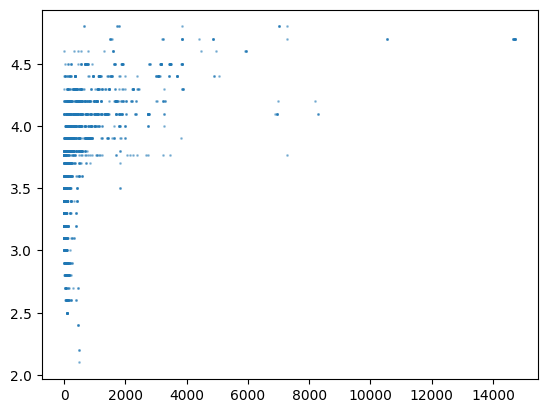

In [167]:
plt.plot(df['votes'], df['rating'], 'o', alpha=0.4, markersize=1)

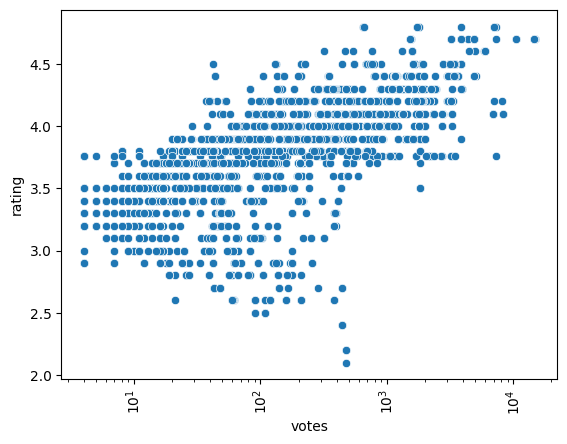

In [168]:
sns.scatterplot(x='votes', y='rating', data=df)
plt.xscale('log')
plt.xticks(rotation=90)
plt.show()

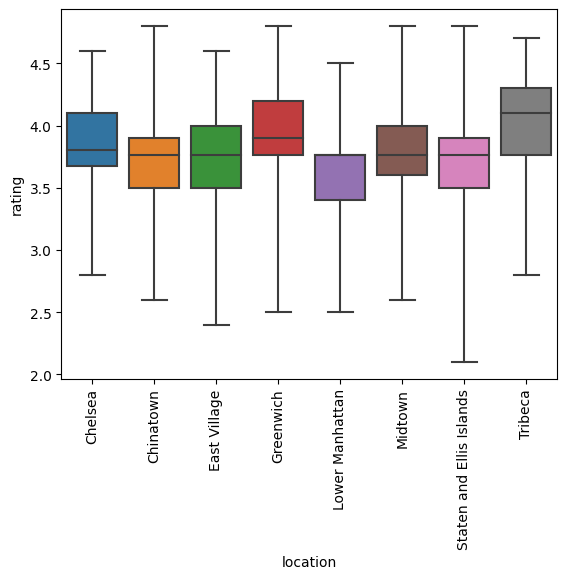

In [169]:
sns.boxplot(x='location', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()

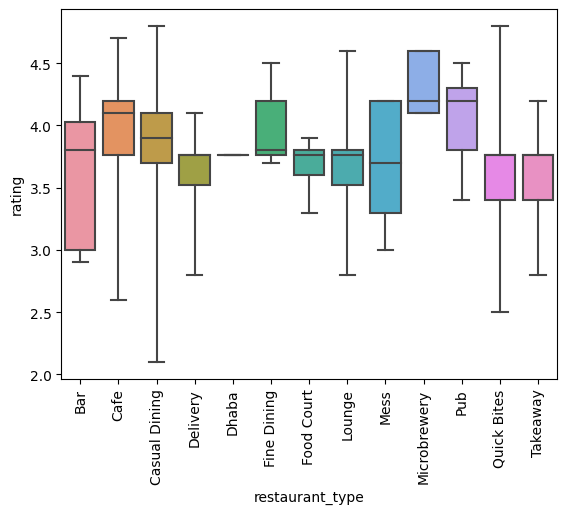

In [170]:
sns.boxplot(x='restaurant_type', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()

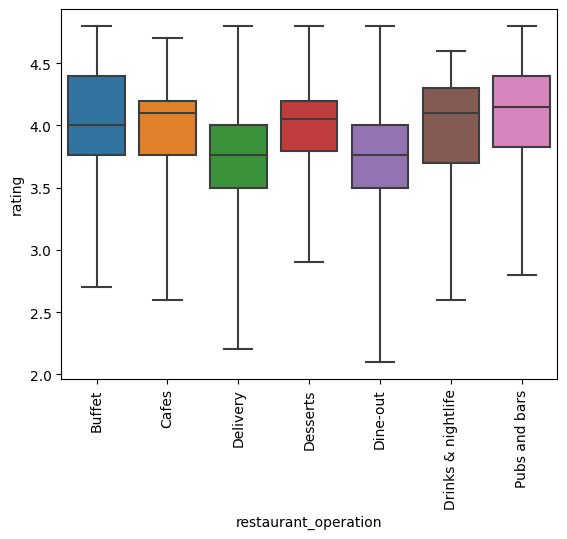

In [171]:
sns.boxplot(x='restaurant_operation', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()

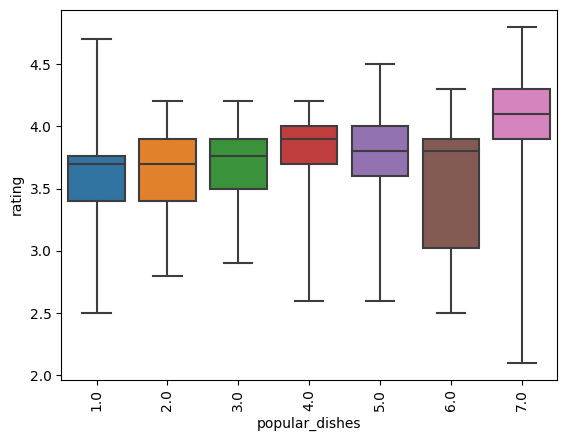

In [172]:
sns.boxplot(x='popular_dishes', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()

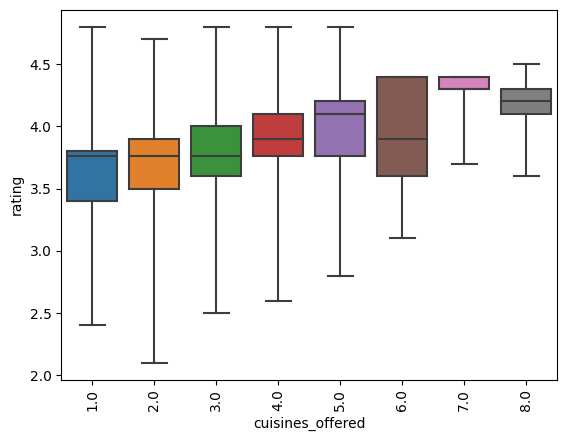

In [173]:
sns.boxplot(x='cuisines_offered', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()

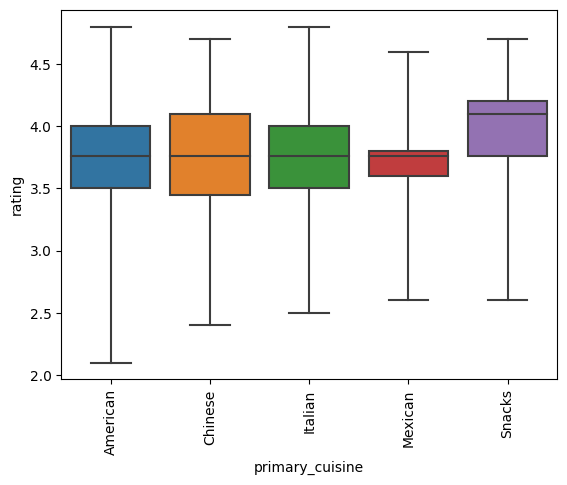

In [174]:
sns.boxplot(x='primary_cuisine', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()

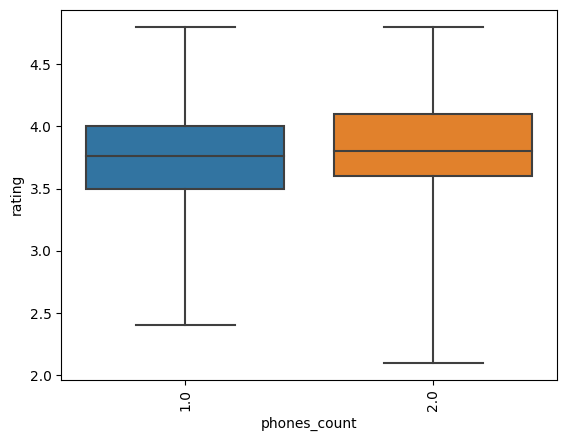

In [175]:
sns.boxplot(x='phones_count', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()
# Looks like there's no 'big' difference between having 1 or 2 phone numbers

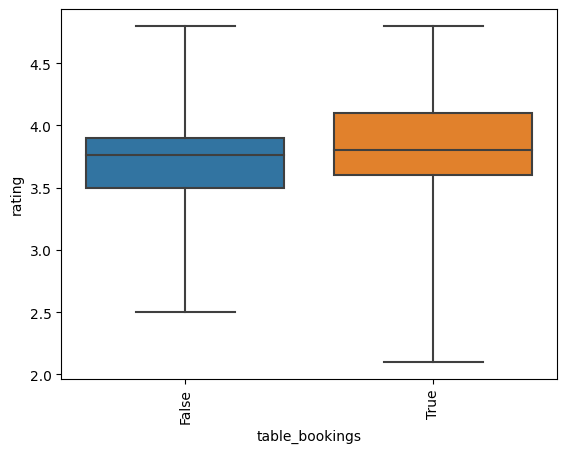

In [176]:
sns.boxplot(x='table_bookings', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()

In [183]:
# I want to make sure that there's enough amount of data in each category
df['table_bookings'].value_counts()

True     2170
False    1314
Name: table_bookings, dtype: int64

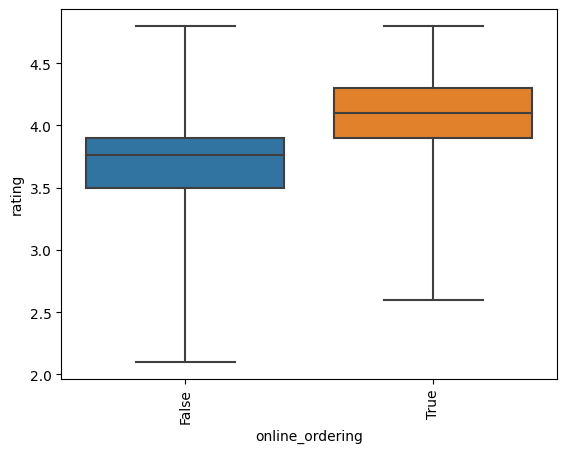

In [177]:
sns.boxplot(x='online_ordering', y='rating', data=df, whis=10)
plt.xticks(rotation=90)
plt.show()

In [182]:
df['online_ordering'].value_counts()

False    2759
True      725
Name: online_ordering, dtype: int64

In [ ]:
# Because our target variable is the restaurant rate and it's a continues variable, so, this is a regression problem,
# And models that can be used for regression is (Linear Regression, )

In [184]:
# Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    3484 non-null   int64   
 1   name                  3484 non-null   object  
 2   table_bookings        3484 non-null   bool    
 3   online_ordering       3484 non-null   bool    
 4   location              3484 non-null   category
 5   rating                3484 non-null   float64 
 6   votes                 3484 non-null   float64 
 7   restaurant_type       3484 non-null   category
 8   restaurant_operation  3484 non-null   category
 9   popular_dishes        3484 non-null   float64 
 10  cuisines_offered      3484 non-null   float64 
 11  primary_cuisine       3484 non-null   category
 12  phones_count          3484 non-null   float64 
dtypes: bool(2), category(4), float64(5), int64(1), object(1)
memory usage: 212.6+ KB


In [258]:
# Lets first to using all the data as it is in LinearRegression
# First, we need to convert the categorical variables to something else because regression is all about numbers
# Lets encode them and drop unwanted columns
cols_to_encode = ['restaurant_type', 'location', 'restaurant_operation', 'primary_cuisine', 'table_bookings', 'online_ordering']
cols_to_drop = ['id', 'name']
df.drop(cols_to_drop, axis=1, inplace=True)
df[cols_to_encode] = df[cols_to_encode].apply(lambda x: LabelEncoder().fit_transform(x))

In [259]:
df.head()

,table_bookings,online_ordering,location,rating,votes,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,phones_count
0,0,0,3,4.200000,1651.0,2,5,7.0,4.0,0,1.0
1,0,0,2,3.763803,0.0,3,2,1.0,1.0,0,2.0
2,0,0,1,2.800000,161.0,2,4,7.0,3.0,1,2.0
3,1,0,3,4.000000,401.0,1,4,7.0,5.0,4,2.0
4,0,1,0,3.800000,11.0,1,4,1.0,2.0,4,1.0


In [260]:
X = df.drop('rating', axis=1).values
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.36537480495934405

### Normal Linear Regression yields a 36.5% score

In [277]:
# Let try to normalize our variables and then try LinearRegression again
X = StandardScaler().fit_transform(df.drop('rating', axis=1))
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.3653748049593528

### No big difference, but lets keep this normalization and try a different model

In [284]:
X = StandardScaler().fit_transform(df.drop('rating', axis=1))
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.7262183045221603

### RandomForestRegressor yields a 73% score, Let see if we can do better!

In [282]:
X = StandardScaler().fit_transform(df.drop('rating', axis=1))
y = df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.5391786656071211

### Lets stick with the RandomForestRegressor and see if we can choose better parameters for it

In [303]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
X = StandardScaler().fit_transform(df.drop('rating', axis=1))
y = df['rating'].values
rf_reg = RandomForestRegressor()
cv_results = cross_val_score(rf_reg, X, y, cv=kf)
print(cv_results)
print(np.mean(cv_results))

[0.71707545 0.79126403 0.82297303 0.82279723 0.78472559 0.83761771
 0.74337883 0.8242645  0.84728976 0.81095463]
0.8002340756761839


### Using only cross validation we can get higher score up to 80%!

In [308]:
# n_estimators = 100, max_depth, min_samples_split = 2, max_leaf_nodes 
kf = KFold(n_splits=10, shuffle=True, random_state=42)
X = StandardScaler().fit_transform(df.drop('rating', axis=1))
y = df['rating'].values
param_grid = {
    'n_estimators': np.arange(100, 200, 10),
    'max_depth': np.arange(5, 20, 1),
    'min_samples_split': np.arange(1, 10, 1),
    'max_leaf_nodes': np.arange(1000, 10000, 100)
}
rf_reg = RandomForestRegressor()
rf_reg_cv = RandomizedSearchCV(rf_reg, param_grid, cv=kf, n_iter=10)
rf_reg_cv.fit(X_train, y_train)
print(rf_reg_cv.best_params_, rf_reg_cv.best_score_)

{'n_estimators': 150, 'min_samples_split': 2, 'max_leaf_nodes': 8100, 'max_depth': 16} 0.7974508262018329


### Apparently the default parameters perform better! Lets stick with it for now

In [317]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
X = StandardScaler().fit_transform(df.drop('rating', axis=1))
y = df['rating'].values
rf_reg = RandomForestRegressor()
cv_results = cross_validate(rf_reg, X, y, cv=kf, scoring = 'accuracy', return_estimator =True)


for estimator in cv_results['estimator']:
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index = (df.drop('rating', axis=1).columns),
                                        columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in 

                      importance
votes                   0.504344
popular_dishes          0.180205
location                0.078863
cuisines_offered        0.064083
primary_cuisine         0.051195
restaurant_type         0.040087
phones_count            0.025810
table_bookings          0.022778
restaurant_operation    0.019781
online_ordering         0.012854
                      importance
votes                   0.515021
popular_dishes          0.170282
location                0.078763
cuisines_offered        0.063024
primary_cuisine         0.053943
restaurant_type         0.038230
phones_count            0.025888
table_bookings          0.023273
restaurant_operation    0.018481
online_ordering         0.013093
                      importance
votes                   0.575842
popular_dishes          0.104941
location                0.076244
cuisines_offered        0.066821
primary_cuisine         0.055779
restaurant_type         0.038580
phones_count            0.024790
table_book

/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/omar/Desktop/Restaurants/restaurants_rating_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in 

### Lets try dropping [restaurant_operation, online_ordering]
### Here, I tried to remove phones_count and table_bookings but it's acually performing better using them

In [328]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
X = StandardScaler().fit_transform(df.drop(['rating', 'restaurant_operation', 'online_ordering'], axis=1))
y = df['rating'].values
rf_reg = RandomForestRegressor()
cv_results = cross_val_score(rf_reg, X, y, cv=kf)
print(cv_results)
print(np.mean(cv_results))

[0.73920543 0.79068169 0.82867273 0.8526992  0.80787555 0.85025225
 0.7543297  0.84429135 0.85410747 0.82657342]
0.8148688787916335
